In [253]:
%matplotlib inline

import os
import numpy as np
import random
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt
import itertools
import matplotlib.patches as mpatches

In [57]:
def create_1000_genomes_continent_labels():
    labels = ['ACB', 'ASW', 'BEB', 'CDX', 'CEU', 'CHB', 'CHS', 'CLM', 'ESN',
              'FIN', 'GBR', 'GIH', 'GWD', 'IBS', 'ITU', 'JPT', 'KHV', 'LWK',
               'MSL', 'MXL', 'PEL', 'PJL', 'PUR', 'STU', 'TSI', 'YRI']

    eas = []
    eur = []
    afr = []
    amr = []
    sas = []

    for i, l in enumerate(labels):
        if l in ['CHB', 'JPT', 'CHS', 'CDX', 'KHV']:
            eas +=  [i]  # EAS
        elif l in ['CEU', 'TSI', 'FIN', 'GBR', 'IBS']:
            eur += [i]  # EUR
        elif l in ['YRI', 'LWK', 'GWD', 'MSL', 'ESN', 'ASW', 'ACB']:
            afr += [i]  # AFR
        elif l in ['MXL', 'PUR', 'CLM', 'PEL']:
            amr += [i]  # AMR
        elif l in ['GIH', 'PJL', 'BEB', 'STU', 'ITU']:
            sas += [i]  # SAS

    cont_labels  = [eas, eur, afr, amr, sas]

    return cont_labels

In [257]:
ethnicity = ['ACB', 'ASW', 'BEB', 'CDX', 'CEU', 'CHB', 'CHS', 'CLM', 'ESN',
             'FIN', 'GBR', 'GIH', 'GWD', 'IBS', 'ITU', 'JPT', 'KHV', 'LWK',
             'MSL', 'MXL', 'PEL', 'PJL', 'PUR', 'STU', 'TSI', 'YRI']

continents = ['EAS', 'EUR', 'AFR', 'AMR', 'SAS']

colors  = [[0, 0.5, 1], [0, 0.5, 1], [0, 0.5, 1]]
all_colors = list(itertools.product(*colors))
random.shuffle(all_colors)

In [270]:
fold = 3
path = '/data/lisatmp4/romerosa/feature_selection/subjects/histo3x26/fold' + str(fold)
layer = 2
which_set = 'test'
category = 'continent'
tsne_n_comps = 2

In [272]:
file_to_load = os.path.join(path, 'layer' + str(layer) + '_' + which_set + '.npz')
data = np.load(file_to_load)

h = data['representation']
l = data['label']


In [273]:
mu = h.mean(0)
sigma = h.std(0)

print(sigma.min())
print(sigma.max())


0.0908358
0.216038


In [274]:
if category == 'continent':
    continent_cat = create_1000_genomes_continent_labels()
    l_cont = np.zeros(l.shape)

    for i,c in enumerate(continent_cat):
        for el in c:
            l_cont[l == el] = i

    l = l_cont.astype('int32')
    labels = continents
else:
    labels = ethnicity
    
colors_plot = [all_colors[el] for el in l]



In [275]:
model = TSNE(n_components=tsne_n_comps, random_state=0)
tsne_h = model.fit_transform(h) 

False


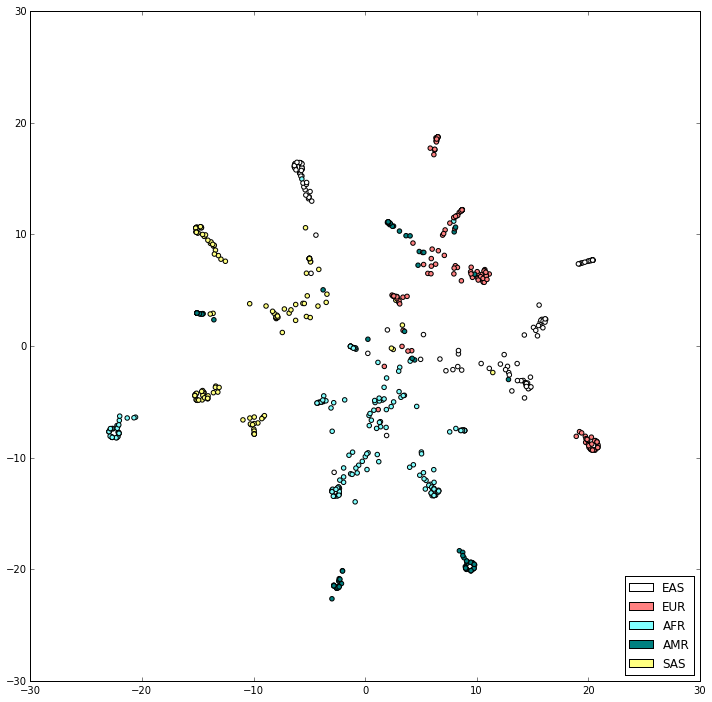

In [276]:
print (0, 0, 0) in colors_plot

fig = plt.figure(figsize=(12, 12))

if tsne_n_comps == 3:
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(tsne_h[:, 0], tsne_h[:, 1], tsne_h[:, 2], c=colors_plot)
else:
    plt.scatter(tsne_h[:, 0], tsne_h[:, 1], c=colors_plot)

recs = []
for i in range(0,len(all_colors)):
    recs.append(mpatches.Rectangle((0,0),1,1,fc=all_colors[i]))
plt.legend(recs,labels,loc=4)



# cb = plt.colorbar()
# loc = np.arange(0, max(l),max(l)/float(len(colors_plot)))
# cb.set_ticks(loc)
# cb.set_ticklabels(labels)
          
plt.show()


In [163]:

colors  = [[0, 128, 255], [0, 128, 255], [0, 128, 255]]
all_colors = list(itertools.product(*colors))

print all_colors

[(0, 0, 0), (0, 0, 128), (0, 0, 255), (0, 128, 0), (0, 128, 128), (0, 128, 255), (0, 255, 0), (0, 255, 128), (0, 255, 255), (128, 0, 0), (128, 0, 128), (128, 0, 255), (128, 128, 0), (128, 128, 128), (128, 128, 255), (128, 255, 0), (128, 255, 128), (128, 255, 255), (255, 0, 0), (255, 0, 128), (255, 0, 255), (255, 128, 0), (255, 128, 128), (255, 128, 255), (255, 255, 0), (255, 255, 128), (255, 255, 255)]


In [147]:
pwd

u'/data/lisa/exp/vazquezd/datasets/polyps_split7/train/masks2'